## 第8章 数値シミュレーションで消費者行動を予測する10本ノック

この記事は[「Python実践データ分析100本ノック」](https://www.amazon.co.jp/dp/B07ZSGSN9S/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1)の演習を実際にやってみたという内容になっています。今まで自己流でやってきましたが、一度他の方々がどのような考え方やコーディングをしているのか勉強してみようと思ってやってみました。本書は実際の業務に活用する上でとても参考になる内容だと思っています。データ分析に関わる仕事をしたい方にお勧めしたいです。


- 数値計算
- 数値シミュレーション

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/ml/data100/08/08_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/ml/data100/08/08_nb.ipynb)

### 筆者の環境

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G95


In [2]:
!python -V

Python 3.5.5 :: Anaconda, Inc.


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)
print('pandas version :', pd.__version__)

matplotlib version : 2.2.2
scipy version : 1.4.1
numpy version : 1.18.1
pandas version : 0.24.2


## 解答

### ノック 71 : 人間関係のネットワークを可視化してみよう

In [4]:
%%bash
head links.csv

,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_links = pd.read_csv('links.csv')
df_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


links.csvにはnode間の関係が行列形式で定義されています。0が無関係、1が関係がありという関係性になっています。

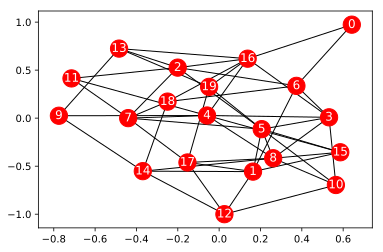

In [6]:
import networkx as nx

G = nx.Graph()

# 頂点の設定
num = len(df_links.index)

for i in range(1, num):
  node_no = df_links.columns[i].strip('Node')
  G.add_node(str(node_no))

# 辺の設定
for i in range(num):
  for j in range(num):
    if df_links.iloc[i][j] == 1:
      # 関係性がある1の場合のみ辺を追加
      G.add_edge(str(i), str(j))

nx.draw_networkx(G, node_color='r', edge_color='k', font_color='w')
plt.show()

ここではnx.drawではなく、nx.draw_networkxメソッドを利用して関係図を可視化しています。これはリンクが多いものが自動的に中心に集められるようになっています。再現性はなく、実行毎に配置が異なるようです。

### ノック 72 : 口コミによる情報伝播の様子を可視化してみよう

口コミが広がっていく様子をシミュレーションしてみます。

In [7]:
def determine_link(percent):
  rand_val = np.random.rand()
  if rand_val <= percent:
    return 1
  return 0

In [8]:
def simulate_percolation(num, list_active, percent_percolation):
  for i in range(num):
    if list_active[i] == 1:
      for j in range(num):
        if df_links.iloc[i][j] == 1:
          if determine_link(percent_percolation) == 1:
            list_active[j] = 1
  return list_active

In [9]:
percent_percolation = 0.1
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []

for t in range(T_NUM):
  list_active = simulate_percolation(NUM, list_active, percent_percolation)
  list_timeSeries.append(list_active.copy())

In [10]:
def active_node_coloring(list_active):
  list_color = []
  for i in range(len(list_timeSeries[t])):
    if list_timeSeries[t][i] == 1:
      list_color.append('r')
    else:
      list_color.append('k')
  return list_color

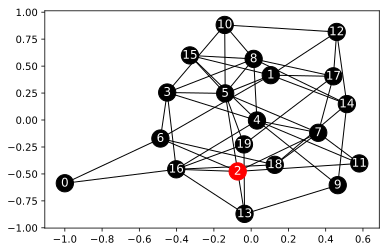

In [11]:
t = 0
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

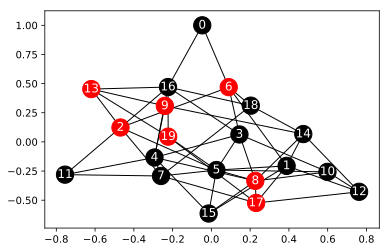

In [12]:
t = 10
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

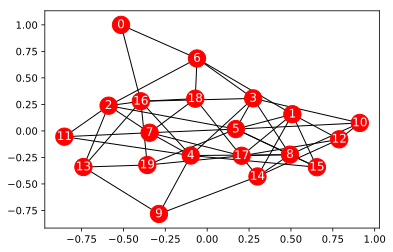

In [13]:
t = 99
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

### ノック 73 : 口コミ数の時系列変化をグラフ化してみよう

口コミが伝播する様子を可視化します。

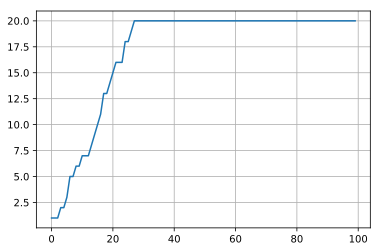

In [14]:
list_timeSeries_num =[]
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.grid()
plt.show()

### ノック 74 : 会員数の時系列変化をシミュレーションしみてよう

口コミによってスポーツジムの利用状況がどのように変化していくかシミュレートします。

In [15]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
  ## 拡散
  for i in range(num):
    if list_active[i] == 1:
      for j in range(num):
        if df_links.iloc[i][j] == 1:
          if determine_link(percent_percolation) == 1:
            list_active[j] = 1
  
  for i in range(num):
    if determine_link(percent_disapparence) == 1:
      list_active[i] = 0
  
  return list_active

In [16]:
percent_percolationpercolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)

list_active[0] = 1

list_timeSeries = []

for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
  list_timeSeries.append(list_active.copy())

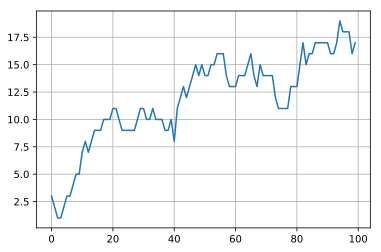

In [17]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.grid()
plt.show()

退会の割合を増やすと利用者が0になる様子をシミュレーション可能。

In [18]:
percent_disapparence = 0.2
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []

for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
  list_timeSeries.append(list_active.copy())

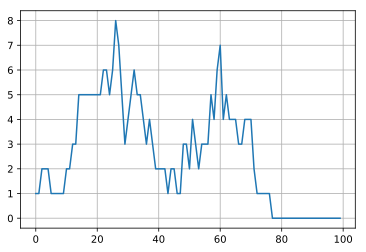

In [19]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.grid()
plt.show()

退会率を20％にすると、20ヶ月以内には利用者が0になることがわかります。

### ノック 75 : パラメタの全体像を、相図を見ながら把握しよう 

拡散と消滅の様子を可視化してみます。

In [20]:
# T_NUM = 100
T_NUM = 1
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram, NUM_PhaseDiagram))

for i_p in range(NUM_PhaseDiagram):
  for i_d in range(NUM_PhaseDiagram):
    percent_percolation = 0.05 * i_p
    percent_disapparence = 0.05 * i_d
    list_active = np.zeros(NUM)
    list_active[0] = 1
    
    for t in range(T_NUM):
      list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    
    phaseDiagram[i_p][i_d] = sum(list_active)

print('END')

END


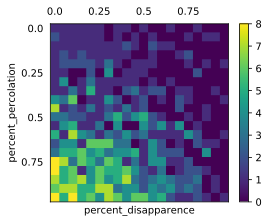

In [21]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))

plt.tick_params(bottom=False, left=False, right=False, top=False)
plt.show()

### ノック 76 : 実データを読み込んでみよう

スポーツジムの実際の状況を読み込みます。

In [22]:
df_mem_links = pd.read_csv('links_members.csv')
df_mem_info = pd.read_csv('info_members.csv')

In [23]:
df_mem_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
df_mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### ノック 77 : リンク数の分布を可視化しよう

リンク数の分布を見るためにヒストグラム表示して見ます。

In [25]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
  array_linkNum[i]  = sum(df_mem_links['Node' + str(i)])

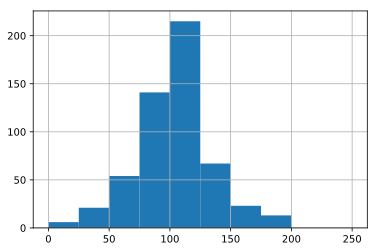

In [26]:
plt.hist(array_linkNum, bins=10, range=(0,250))
plt.grid()
plt.show()

### ノック 78 : シミュレーションのために実データからパラメタを推定しよう

In [27]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns) - 1

count_active = 0
count_active_to_inactive = 0

for t in range(1, T_NUM):
  for i in range(NUM):
    if (df_mem_info.iloc[i][t] == 1):
      count_active_to_inactive += 1
      if df_mem_info.iloc[i][t + 1] == 0:
        count_active += 1

estimated_percent_disapprence = count_active / count_active_to_inactive

In [28]:
count_link = 0
count_link_to_active = 0
count_link_temp = 0

for t in range(T_NUM - 1):
  df_link_t = df_mem_info[df_mem_info[str(t)] == 1]
  temp_flag_count = np.zeros(NUM)
  for i in range(len(df_link_t.index)):
    df_link_temp = df_mem_links[df_mem_links["Node" + str(df_link_t.index[i])] == 1]
    
    for j in range(len(df_link_temp.index)):
      if df_mem_info.iloc[df_link_temp.index[j]][t] == 0 :
        if temp_flag_count[df_link_temp.index[j]] == 0:
          count_link += 1
        if df_mem_info.iloc[df_link_temp.index[j]][t + 1] == 1:
          if temp_flag_count[df_link_temp.index[j]] == 0:
            temp_flag_count[df_link_temp.index[j]] = 1
            count_link_to_active += 1

estimated_percent_percolation = count_link_to_active / count_link

### ノック 79 : 実データとシミュレーションを比較しよう

非力なマシンだとかなり時間がかかります。

In [29]:
percent_percolation = 0.02518
percent_disapparence = 0.10147

T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)

list_active[0] = 1
list_timeSeries = []

for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
  list_timeSeries.append(list_active.copy())

In [30]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

In [31]:
T_NUM = len(df_mem_info.columns) - 1
list_timeSeries_num_real = []
for t in range(0, T_NUM):
  list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)] == 1].index))

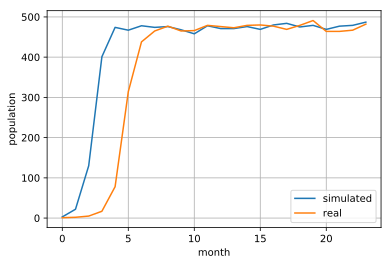

In [34]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### ノック 80 : シミュレーションによる将来予測を実施しよう

In [ ]:
T_NUM = 36

## 関連記事
- [第1章 ウェブからの注文数を分析する10本ノック](/ml/data100/01/)
- [第2章 小売店のデータでデータ加工を行う10本ノック](/ml/data100/02/)
- [第3章 顧客の全体像を把握する10本ノック](/ml/data100/03/)
- [第4章 顧客の行動を予測する10本ノック](/ml/data100/04/)
- [第5章 顧客の退会を予測する10本ノック](/ml/data100/05/)
- [第6章 物流の最適ルートをコンサルティングする10本ノック](/ml/data100/06/)
- [第7章 ロジスティクスネットワークの最適設計を行う10本ノック](/ml/data100/07/)
- [第8章 数値シミュレーションで消費者行動を予測する10本ノック](/ml/data100/08/)
- [第9章 潜在顧客を把握するための画像認識10本ノック](/ml/data100/09/)
- [第10章 アンケート分析を行うための自然言語処理10本ノック](/ml/data100/10/)